In [1]:
#libraries
import pandas as pd
import sys 
from imblearn.over_sampling import SMOTE
import seaborn as sns # used for plot interactive graph. 
import numpy as np # linear algebra
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt # this is used for the plot the graph 

In [2]:
testx=pd.read_csv("data files/testx.csv",index_col=0);
testy=pd.read_csv("data files/testy.csv",index_col=0);
trainx=pd.read_csv("data files/trainx.csv",index_col=0);
trainy=pd.read_csv("data files/trainy.csv",index_col=0);

In [4]:
trainx.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),precip
0,27.777778,26.966667,0.31,4.1860,270.0,16.1000,1016.80,1.0
1,12.072222,12.072222,0.64,13.6850,210.0,16.1000,1016.88,1.0
2,17.550000,17.550000,0.74,7.7763,171.0,9.9820,1013.55,1.0
3,15.088889,15.088889,0.93,3.4615,97.0,11.4471,1006.14,1.0
4,22.233333,22.233333,0.76,5.7155,57.0,6.1019,1014.39,1.0


In [5]:
trainy.head()

,summary
0,1
1,1
2,1
3,2
4,1


In [7]:
classifier=GaussianNB();
classifier.fit(trainx,trainy.values.ravel());
prediction=classifier.predict(testx);

In [8]:
print(confusion_matrix(testy,prediction))
print(classification_report(testy,prediction))

[[8360 2684 1528   65  124   14    0   21]
 [5223 3559 2185   66  162   39    1   18]
 [1007 2329 2674   67  465   29    0    7]
 [2144  887  936  296  122    4    0    0]
 [   1   12  144   51 2596    0    0    0]
 [   0    1   20    1    0  143   12   18]
 [   3   16    2    0    0  102   19   65]
 [   6    1    0    1    0   40    8   79]]
              precision    recall  f1-score   support

           1       0.50      0.65      0.57     12796
           2       0.38      0.32      0.34     11253
           3       0.36      0.41      0.38      6578
           4       0.54      0.07      0.12      4389
           5       0.75      0.93      0.83      2804
           6       0.39      0.73      0.51       195
           7       0.47      0.09      0.15       207
           8       0.38      0.59      0.46       135

    accuracy                           0.46     38357
   macro avg       0.47      0.47      0.42     38357
weighted avg       0.46      0.46      0.43     38357



In [3]:
testx_std=pd.read_csv("data files/std_testx.csv",index_col=0);
trainx_std=pd.read_csv("data files/std_trainx.csv",index_col=0);
testx_norm=pd.read_csv("data files/norm_testx.csv",index_col=0);
trainx_norm=pd.read_csv("data files/norm_trainx.csv",index_col=0);


max accuracy of 0.4555246791054651 at var_smoothing= 0


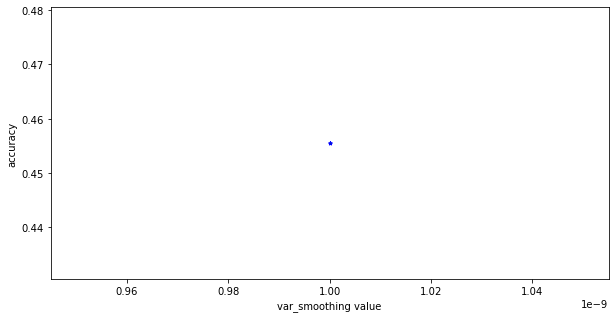

In [52]:
#we want the maximum accuracy for the model, deciding best var_smoothing value
accuracy=[];#array for all the accuracies 

for i in np.arange(1e-9,1e-8):#test all k values from 1 to 50
    classifier=GaussianNB(var_smoothing=i);
    classifier.fit(trainx,trainy.values.ravel());
    prediction=classifier.predict(testx);#predict the value
    accuracy.append(metrics.accuracy_score(testy,prediction));#add accuracy to the array
    

#plot k value vs accuracy     
plt.figure(figsize=(10,5));
plt.plot(np.arange(1e-9,1e-8),accuracy,color='blue', linestyle='-', marker='*', markerfacecolor='green',markersize=4);
plt.xlabel('var_smoothing value');
plt.ylabel('accuracy');
print("max accuracy of", max(accuracy),"at var_smoothing=",accuracy.index(max(accuracy)));
#best var_smoothing value has been determined to be at var_smoothing=

In [53]:
classifier=GaussianNB(var_smoothing=0);
classifier.fit(trainx,trainy.values.ravel());
prediction=classifier.predict(testx);

print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           1       0.52      0.59      0.55     12646
           2       0.39      0.27      0.32     11207
           3       0.34      0.56      0.42      6710
           4       0.35      0.06      0.11      4351
           5       0.66      0.94      0.77      2871

    accuracy                           0.46     37785
   macro avg       0.45      0.48      0.44     37785
weighted avg       0.44      0.46      0.43     37785



In [20]:
classifier=GaussianNB();
classifier.fit(trainx_std,trainy.values.ravel());
prediction=classifier.predict(testx_std);

print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           1       0.52      0.59      0.55     12646
           2       0.39      0.27      0.32     11207
           3       0.34      0.56      0.42      6710
           4       0.35      0.06      0.11      4351
           5       0.66      0.94      0.77      2871

    accuracy                           0.46     37785
   macro avg       0.45      0.48      0.44     37785
weighted avg       0.44      0.46      0.43     37785



In [54]:
classifier=GaussianNB(var_smoothing=1e-10);
classifier.fit(trainx_norm,trainy.values.ravel());
prediction=classifier.predict(testx_norm);

print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           1       0.52      0.59      0.55     12646
           2       0.39      0.27      0.32     11207
           3       0.34      0.56      0.42      6710
           4       0.35      0.06      0.11      4351
           5       0.66      0.94      0.77      2871

    accuracy                           0.46     37785
   macro avg       0.45      0.48      0.44     37785
weighted avg       0.44      0.46      0.43     37785



In [14]:
nb=GaussianNB();

params={'var_smoothing':np.logspace(0,-15,num=1000)}

gridsearch=GridSearchCV(nb,param_grid=params,cv=10,scoring='accuracy');

newdata=PowerTransformer().fit_transform(trainx)

gridsearch.fit(newdata,trainy.values.ravel());


In [15]:
gridsearch.best_params_

{'var_smoothing': 1e-05}

In [16]:
gridsearch.best_score_


0.4728022492970948

In [23]:
##need to make a funciton to casll
def naiveBayesModel(xtrain, ytrain, xtest,ytest):
    
    #knn model using best parameters found above
    
    nb=GaussianNB(var_smoothing=1e-05);
    #newdata=PowerTransformer().fit_transform(trainx)

    nb.fit(xtrain,ytrain.values.ravel());
    
    prediction=nb.predict(xtest);
    
    print(classification_report(ytest,prediction))
    
    

In [24]:
naiveBayesModel(trainx_std,trainy, testx_std,testy)

              precision    recall  f1-score   support

           1       0.52      0.59      0.55     12646
           2       0.39      0.27      0.32     11207
           3       0.34      0.56      0.42      6710
           4       0.35      0.06      0.11      4351
           5       0.66      0.94      0.77      2871

    accuracy                           0.46     37785
   macro avg       0.45      0.48      0.44     37785
weighted avg       0.44      0.46      0.43     37785



In [25]:
naiveBayesModel(trainx,trainy, testx,testy)

              precision    recall  f1-score   support

           1       0.50      0.61      0.55     12646
           2       0.40      0.28      0.33     11207
           3       0.34      0.50      0.41      6710
           4       0.36      0.07      0.11      4351
           5       0.66      0.93      0.77      2871

    accuracy                           0.46     37785
   macro avg       0.45      0.48      0.43     37785
weighted avg       0.44      0.46      0.43     37785



In [26]:
naiveBayesModel(trainx_norm,trainy, testx_norm,testy)

              precision    recall  f1-score   support

           1       0.52      0.59      0.55     12646
           2       0.39      0.27      0.32     11207
           3       0.34      0.56      0.42      6710
           4       0.35      0.06      0.11      4351
           5       0.66      0.94      0.77      2871

    accuracy                           0.46     37785
   macro avg       0.45      0.48      0.44     37785
weighted avg       0.44      0.46      0.43     37785

